In [2]:
# python required >= 3.5 version
import sys
assert sys.version_info >=(3,5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

import numpy as np
import os
import pandas as pd
# make the output satable accros run
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

ROOT = "."
chapter_id = "DNN"
image_path = os.path.join(ROOT,"images",chapter_id)
os.makedirs(image_path,exist_ok=True)

def save_fig(fig_id,tigh_layout=True,fig_extension="png",resolution=300):
    path = os.path.join(image_path,fig_id + "." + fig_extension)
    print("save figure ",fig_id)
    if tigh_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)


# make the logistic sigmoid activation function

In [2]:
def logits(z):
    return 1 / (1 + np.exp(-z))

save figure  sigmoid_saturation


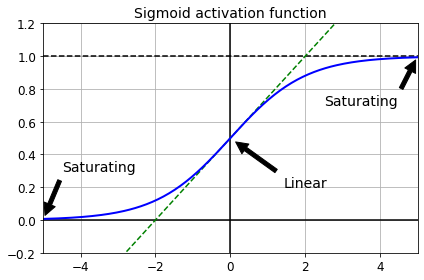

In [3]:
z = np.linspace(-5,5,200)

plt.plot([-5,5],[0,0],'k-')
plt.plot([-5,5],[1,1],"k--")
plt.plot([0,0],[-0.2,1.2],"k-")
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z,logits(z),"b-",linewidth=2)

props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")

plt.title("Sigmoid activation function", fontsize=14)
plt.grid(True)
plt.axis([-5,5, -0.2,1.2])
save_fig("sigmoid_saturation")
plt.show()


# Xavier and He Initialization

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
# glorot initializier => fan avg
keras.layers.Dense(10, activation="sigmoid",kernel_initializer="glorot_normal")

In [6]:
# variance scaling => merubah sebuah bentuk dari arsitektur
he_uniform_init = keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution="uniform")
value=keras.layers.Dense(10,activation="relu",kernel_initializer=he_uniform_init) 

membuat sebuah aliran signal menjadi baik pada forward dan backward dan tidak membuat aliran signal menjadi mati (die) => saturation dan explode. maka diperlukan weight initializers untuk membuat sebuah lower layers terdistribusi normal atau uniform(seragam) 

# Nonsaturating activation function

# Leaky relu

In [7]:
def leaky_relu(z,alpha=0.01):
    return np.maximum(alpha*z,z)

save figure  leaky_relu_plot


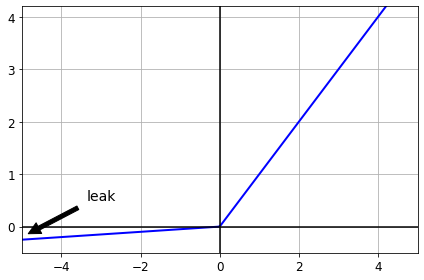

In [8]:
z = np.linspace(-5,5,200)
plt.plot(z,leaky_relu(z,0.05),"b-",linewidth=2)
plt.plot([-5,5],[0,0],"k-")
plt.plot([0,0],[-0.5,4.2],"k-")

props = dict(facecolor="black",shrink=0.1)
plt.annotate("leak",xytext=(-3,0.5),xy=(-5,-0.2),arrowprops=props,fontsize=14,ha="center")

plt.grid(True)
plt.axis([-5,5, -0.5,4.2])
save_fig("leaky_relu_plot")
plt.show()

In [9]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
# menegtahui activation variants pada relu 
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [3]:
# coba Leaky relu
(X_train_full,y_train_full),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()
# standarisasi train data
X_train_full = X_train_full/255.0

# split train data to train and validasi data
X_valid,X_train = X_train_full[:5000], X_train_full[5000:]
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
# satble configurasi output
tf.random.set_seed(42)
np.random.seed(42)

# create sequential mode
model_leak = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,kernel_initializer="he_normal"),#default => none(linear activation)
    keras.layers.LeakyReLU(alpha=0.001),
    
    keras.layers.Dense(100,kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.001),
    keras.layers.Dense(10,activation="softmax")
])

In [13]:
model_leak.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                   metrics=["accuracy"])

In [14]:
history = model_leak.fit(X_train,y_train,epochs=10,
                         validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.3469 - accuracy: 0.6206 - val_loss: 0.9260 - val_accuracy: 0.7184
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8201 - accuracy: 0.7354 - val_loss: 0.7309 - val_accuracy: 0.7624
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6968 - accuracy: 0.7694 - val_loss: 0.6567 - val_accuracy: 0.7876
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6333 - accuracy: 0.7909 - val_loss: 0.6005 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5918 - accuracy: 0.8054 - val_loss: 0.5657 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5619 - accuracy: 0.8135 - val_loss: 0.5408 - val_accuracy: 0.8234
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5391 - accuracy: 0.8203 - val_loss: 0.5198 - val_accuracy:

In [15]:
model_leak.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 67.6361 - accuracy: 0.8040


[67.6360855102539, 0.8040000200271606]

In [16]:
X_new=X_test[0:3]
y_test[0:3]

array([9, 2, 1], dtype=uint8)

In [17]:
np.argmax(model_leak.predict(X_new),axis=1)

1/1 [==============================] - 0s 64ms/step


array([9, 2, 1], dtype=int64)

# Prelu

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,kernel_initializer="he_normal"),
    keras.layers.PReLU(alpha_initializer=keras.initializers.Constant(value=0.25),alpha_regularizer= keras.regularizers.l2(1e-2)),
    keras.layers.Dense(100,kernel_initializer="he_normal"),
    keras.layers.PReLU(alpha_initializer=keras.initializers.Constant(value=0.25),alpha_regularizer= keras.regularizers.l2(1e-2)),
    keras.layers.Dense(10,activation="softmax",kernel_initializer='glorot_uniform')
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train,y_train,epochs=10,
                    validation_data=[X_valid,y_valid])

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.5404 - accuracy: 0.6206 - val_loss: 1.1328 - val_accuracy: 0.7148
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0293 - accuracy: 0.7359 - val_loss: 0.9378 - val_accuracy: 0.7638
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8980 - accuracy: 0.7711 - val_loss: 0.8515 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8228 - accuracy: 0.7938 - val_loss: 0.7838 - val_accuracy: 0.8076
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7702 - accuracy: 0.8074 - val_loss: 0.7386 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7295 - accuracy: 0.8161 - val_loss: 0.7031 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6961 - accuracy: 0.8223 - val_loss: 0.6724 - val_accuracy:

# ELU

In [18]:
def elu(z,alpha=1):
    return np.where(z<0, alpha * (np.exp(z)-1),z) # False , True

save figure  elu_plot


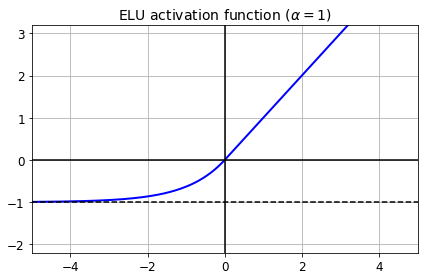

In [19]:
z = np.linspace(-5,5,200)
plt.plot(z,elu(z),"b-",linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')

plt.grid(True)
plt.axis([-5,5, -2.2,3.2])
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
save_fig("elu_plot")
plt.show()

In [20]:
# used the elu activation function
keras.layers.Dense(10,activation="elu")

# SELU

This activation function was proposed in this [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ<sub>1</sub> or ℓ<sub>2</sub> regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [21]:
from scipy.special import erfc
# aplha and scale to self normalize with mean 0 and standar deviation 1
# \ => cut off syntax line jika kepanjangan ke line baru
alpha_0_1 = -np.sqrt(2/np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) -1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) \
    * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)\
    *erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [22]:
def selu(z,scale=scale_0_1,alpha=alpha_0_1):
    return scale * elu(z,alpha=alpha)

save figure  selu_plot


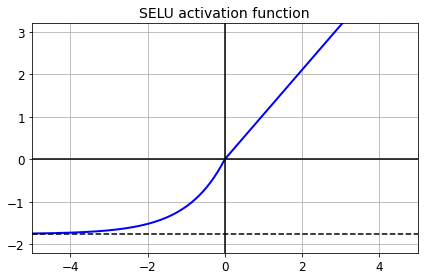

In [23]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

By default, the SELU hyperparameters (`scale` and `alpha`) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [24]:
np.random.seed(42)
Z = np.random.normal(size=(500,100)) #standarized input 
for layer in range (1000):
    W = np.random.normal(size=(100,100), scale=np.sqrt(1/100)) # Lecun initializer
    Z = selu(np.dot(Z,W))
    means = np.mean(Z,axis=0).mean()
    stds = np.std(Z,axis=0).mean()
    if layer % 100 ==0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [25]:
# using selu
keras.layers.Dense(10,activation="selu",kernel_initializer="lecun_normal")

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model_selu = keras.models.Sequential()
model_selu.add(keras.layers.Flatten(input_shape=[28, 28]))
model_selu.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model_selu.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model_selu.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model_selu.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                   metrics=["accuracy"])

In [29]:
pixel_means=X_train.mean(axis=0,keepdims=True)
pixel_stds = X_train.std(axis=0,keepdims=True)
X_train_scalled = (X_train - pixel_means) / pixel_stds
X_valid_scalled = (X_valid - pixel_means) / pixel_stds
X_test_scalled = (X_test - pixel_means) / pixel_stds

In [30]:
history_selu = model_selu.fit(X_train_scalled,y_train,epochs=5,
                              validation_data=[X_valid_scalled,y_valid])

Epoch 1/5
1719/1719 [==============================] - 19s 9ms/step - loss: 1.1603 - accuracy: 0.5580 - val_loss: 0.8235 - val_accuracy: 0.6790
Epoch 2/5
1719/1719 [==============================] - 15s 9ms/step - loss: 1.0473 - accuracy: 0.5896 - val_loss: 1.0603 - val_accuracy: 0.6168
Epoch 3/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.7831 - accuracy: 0.7039 - val_loss: 0.7417 - val_accuracy: 0.7076
Epoch 4/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.6896 - accuracy: 0.7413 - val_loss: 0.6348 - val_accuracy: 0.7616
Epoch 5/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6301 - accuracy: 0.7647 - val_loss: 0.6006 - val_accuracy: 0.7728


In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model_relu = keras.models.Sequential()
model_relu.add(keras.layers.Flatten(input_shape=[28,28]))
model_relu.add(keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"))
for layer in range(99):
    model_relu.add(keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model_relu.add(keras.layers.Dense(10,activation="softmax"))

In [33]:
model_relu.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                   metrics=["accuracy"])

In [34]:
history_relu = model_relu.fit(X_train_scalled,y_train,epochs=5,
                              validation_data=[X_valid_scalled,y_valid])

Epoch 1/5
1719/1719 [==============================] - 15s 8ms/step - loss: 1.7633 - accuracy: 0.2841 - val_loss: 1.4509 - val_accuracy: 0.4092
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 1.1236 - accuracy: 0.5252 - val_loss: 0.9847 - val_accuracy: 0.6056
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9252 - accuracy: 0.6284 - val_loss: 0.8289 - val_accuracy: 0.6550
Epoch 4/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8264 - accuracy: 0.6867 - val_loss: 0.7351 - val_accuracy: 0.7404
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 1.0654 - accuracy: 0.6105 - val_loss: 0.7907 - val_accuracy: 0.7132


Terancam mengalami sebuah exploding gradient yang mana terjadi karena lower layers memiliki loss function yang besar dikarenakan sebuah nilai dari weights yang terlalu rendah pada weight update sehingga cenderung terjadi underfitting, 

# Batch normalization

In [41]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [44]:
[m for m in dir(keras.layers) if not m.startswith("_")]

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalM

In [45]:
model_BN1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation="softmax")
])

In [46]:
model_BN1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_215 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_216 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_8 (Batc  (None, 100)             

pada di BN terdapat 4 variabel yang dibutuhkan pada  y,B,moving means, moving variance.
pada moving menas, dan moving variance tidak dibutuhkan pada bakckward pass makannya termasuk kedalam non traiable dan hanya diperuntuhkan pada forward chainng agar setiap output terscale dan shifting 0 centered

In [48]:
Bn1 = model_BN1.layers[1]
[(var.name, var.trainable) for var in (Bn1.variables)]

[('batch_normalization_6/gamma:0', True),
 ('batch_normalization_6/beta:0', True),
 ('batch_normalization_6/moving_mean:0', False),
 ('batch_normalization_6/moving_variance:0', False)]

In [49]:
model_BN1.compile(loss="sparse_categorical_crossentropy",
                  optimizer= keras.optimizers.SGD(learning_rate=1e-3),
                  metrics=["accuracy"])


In [51]:
history_BN1 = model_BN1.fit(X_train,y_train,epochs=10,
                            validation_data=[X_valid,y_valid])

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3817 - accuracy: 0.8663 - val_loss: 0.3628 - val_accuracy: 0.8742
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8655 - val_loss: 0.3572 - val_accuracy: 0.8760
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3706 - accuracy: 0.8683 - val_loss: 0.3552 - val_accuracy: 0.8782
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3617 - accuracy: 0.8717 - val_loss: 0.3514 - val_accuracy: 0.8754
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3538 - accuracy: 0.8742 - val_loss: 0.3484 - val_accuracy: 0.8800
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3504 - accuracy: 0.8753 - val_loss: 0.3470 - val_accuracy: 0.8790
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3441 - accuracy: 0.8778 - val_loss: 0.3432 - val_accuracy:

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer has some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [55]:
model_before_BN1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100,use_bias=True),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [56]:
model_before_BN1.compile(loss=["sparse_categorical_crossentropy"],
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [57]:
model_before_BN1.fit(X_train,y_train,epochs=10,
                     validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 1.0347 - accuracy: 0.6824 - val_loss: 0.6709 - val_accuracy: 0.7910
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6714 - accuracy: 0.7843 - val_loss: 0.5485 - val_accuracy: 0.8188
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5900 - accuracy: 0.8047 - val_loss: 0.4936 - val_accuracy: 0.8330
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5395 - accuracy: 0.8185 - val_loss: 0.4612 - val_accuracy: 0.8440
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5065 - accuracy: 0.8275 - val_loss: 0.4381 - val_accuracy: 0.8500
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4853 - accuracy: 0.8332 - val_loss: 0.4212 - val_accuracy: 0.8560
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4696 - accuracy: 0.8387 - val_loss: 0.4085 - val_accuracy: